## House Prices Prediction 

### Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### Some important libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
import arviz as az
import pymc3 as pm
from theano import shared
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression

### Data Cleaning and EDA

In [ ]:
# Loading dataset
data = pd.read_csv("train.csv")

In [ ]:
print(data.shape)
print(data.head)

(1460, 81)
<bound method NDFrame.head of         Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]>


##### This is a house SalePrice prediction dataset with 1460 rows and 81 columns.

In [ ]:
# Getting a bird eye view detail of the dataset
data.describe(include = "all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,...,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,...,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,...,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,...,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,...,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.0

* The data description was extracted to get a bird eye view of the dataset. This step helped me determine that there were many null/NAN values in the dataset which needed to be handled. Moreover, I got to know that my dataset was containing many categorical data columns and an idea of overall distribution of many columns

#### Identifying and dealing with Missing values

Creating a generic method to get and return all the columns that have null/NAN values in them along with the number of assignments. The reason for generic method is to automatically detect and calculate count of null values in any given dataset. This way, I would be able to use this general purpose method for most of the datasets.

In [ ]:
def check_nulls_in_columns():
    # Getting the number of rows and columns with null values in the dataset
    columns_having_null_values = data[data.columns[data.isnull().sum()>0]]
    print(columns_having_null_values.count())
    columns_having_null_values

The simple function call return the column names with null values and the count of it as well.

In [ ]:
check_nulls_in_columns()

LotFrontage     1201
Alley             91
MasVnrType      1452
MasVnrArea      1452
BsmtQual        1423
BsmtCond        1423
BsmtExposure    1422
BsmtFinType1    1423
BsmtFinType2    1422
Electrical      1459
FireplaceQu      770
GarageType      1379
GarageYrBlt     1379
GarageFinish    1379
GarageQual      1379
GarageCond      1379
PoolQC             7
Fence            281
MiscFeature       54
dtype: int64


In [ ]:
# Separating Id column from data X
y = data.SalePrice
X = data.drop(columns=["Id"], axis=1)

* To deal with the missing values for Categorical columns, I viewed each of those columns' values and filled the null value with the most occuring label for that column. 
* For numerical columns, I simply replaced the null values with mean value of that column.

In [ ]:
# Checking what values are occuring in the dataset
X['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
# Filling the most occuring value as a house must have Electrical items/connections instead of None
X['Electrical'].fillna("Sbrkr", inplace=True)

In [ ]:
# Filling with relevant values in each column. Most of them are filled with None values except the ones which are a must have

X['MSZoning'].value_counts()
#Filling null values with 'RL'
X['MSZoning'].fillna("RL",inplace=True)

#Filling nul values with mean
X['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)

X['Alley'].fillna("Nothing", inplace=True)
X['Utilities'].fillna("AllPub", inplace=True)
X['Exterior1st'].fillna("VinylSd", inplace=True)
X['Exterior2nd'].fillna("VinylSd", inplace=True)
X['MasVnrArea'].fillna(0, inplace=True)
X['MasVnrType'].fillna("None", inplace=True)
X['BsmtCond'].fillna("No", inplace=True)
X['BsmtExposure'].fillna("NB", inplace=True)
X['BsmtFinType1'].fillna("NB", inplace=True)
X['BsmtFinSF1'].fillna(0.0, inplace=True)
X['BsmtFinSF2'].fillna(0.0, inplace=True)
X['BsmtUnfSF'].fillna(0.0, inplace=True)
X['TotalBsmtSF'].fillna(0.0, inplace=True)
X['BsmtFullBath'].fillna(0.0, inplace=True)
X['BsmtHalfBath'].fillna(0.0, inplace=True)
X['KitchenQual'].fillna("TA", inplace=True)
X['Functional'].fillna("Typ", inplace=True)
X['FireplaceQu'].fillna("None", inplace=True)
X['GarageType'].fillna("No", inplace=True)
X['GarageYrBlt'].fillna(0, inplace=True)
X['GarageFinish'].fillna("No", inplace=True)
X['GarageCars'].fillna(0, inplace=True)
X['GarageArea'].fillna(0, inplace=True)
X['GarageQual'].fillna("No", inplace=True)
X['GarageCond'].fillna("No", inplace=True)
X['PoolQC'].fillna("No", inplace=True)
X['Fence'].fillna("No", inplace=True)
X['MiscFeature'].fillna("No", inplace=True)
X['SaleType'].fillna("Con", inplace=True)
X['SaleCondition'].fillna("None", inplace=True)
X['BsmtQual'].fillna("TA", inplace=True)
X['BsmtFinType2'].fillna("Unf", inplace=True)

To achieve better results and reduce complexity of the model, we should keep the input columns/features that are least correlated with each other. Hence, to remove all those most correlated input features and only keeping one of those, I created this general function that can be used for most of the datasets

In [ ]:
def remove_most_correlated():
    # Getting the Correlation matrix
    corr_matrix = X.corr()

    # Changing the matrix to upper triangle as it's a symmetrical matrix and diagonal values will always be 1
    upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    #Dropping columns with high correlation
    drop_columns = [col for col in upper_matrix.columns if any(upper_matrix[col] > 0.65)]
    X.drop(X[drop_columns], axis=1, inplace=True)
    print(X)

#### Encoding labels of the categorical variables

I created this function to find and encode all the categorical data columns into numeric integers for any dataset provided.

In [181]:
def encode_categorical_values():
    # Extracting columns with categorical values
    object_columnns = X[X.columns[X.dtypes=='object']]
    # Encoding the categorical values 
    for i in object_columnns:
        label = LabelEncoder()
        label.fit(X[i].values)
        X[i] = label.transform(X[i].values)
    # Verifying if all the values are encoded
    object_columnns = X[X.columns[X.dtypes=='object']]
#     print(object_columnns.columns)

As normalization is a really important step before training, so the below function was created for the same purpose of normalizing all the columns of the given dataset.

In [182]:
def normalize_columns():
    # Normalizing all the columns so that high magnitude has no impact on columns with lower magnitudes.
    names = X.columns
    prepro = preprocessing.normalize(X)
    return pd.DataFrame(prepro, columns=names)

In [ ]:
encode_categorical_values()

#### Performing feature selection on the basis of Correlation with target variable

This step was optional as I used it only once. This code cell performs Feature Selection by first calculating Correlation of all input columns/features with the target variable. As the correlation with the target variable should be the most, therefore, I selected the features that have the higher correlation than a certain threshold.
* Keeping a threshold of 0.3 and -0.3, resulted in 20 features to be selected

In [ ]:
remove_most_correlated()
X["SalePrice"] = y
corr_matrix = X.corr()
# Changing the matrix to upper triangle as it's a symmetrical matrix and diagonal values will always be 1
upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
y_corr = upper_matrix['SalePrice']
y_corr_filtered = [k for k,v in enumerate(y_corr) if v >= 0.3 or v <= -0.3]
cols = dict()
for col in y_corr_filtered:
    col_name = y_corr.index[col]
    print(col_name)
    cols[col_name] = X[col_name]
X_filtered = pd.DataFrame(cols)
print(X_filtered)

      MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
0             60         3         65.0  ...    2008         8              4
1             20         3         80.0  ...    2007         8              4
2             60         3         68.0  ...    2008         8              4
3             70         3         60.0  ...    2006         8              0
4             60         3         84.0  ...    2008         8              4
...          ...       ...          ...  ...     ...       ...            ...
1455          60         3         62.0  ...    2007         8              4
1456          20         3         85.0  ...    2010         8              4
1457          70         3         66.0  ...    2010         8              4
1458          20         3         68.0  ...    2010         8              4
1459          20         3         75.0  ...    2008         8              4

[1460 rows x 73 columns]
LotFrontage
OverallQual
YearBuilt
Year

Calling the function that was created above and separating the x & y values from the normalized dataset

In [ ]:
#Normalizing the data
X_scaled = normalize_columns()
y_scaled = X_scaled.SalePrice
X_scaled = X_scaled.drop(columns=["SalePrice"], axis=1)

In [ ]:
names = X_filtered.columns
prepro = preprocessing.normalize(X_filtered)
X_filtered_scaled = pd.DataFrame(prepro, columns=names)

This is the heatmap that I plotted to visualize the correlation between all the selected/remaining columns in the dataset.

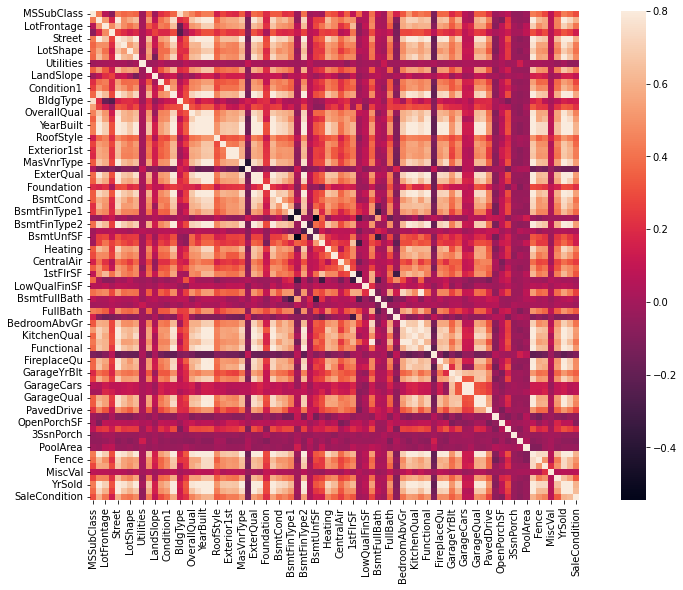

In [ ]:
#Correlation matrix

corrmatrix = X_scaled.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

In [ ]:
def barplot(x_title, y_title):
    plt.title(x_title + ' vs ' + y_title)
    sns.barplot(x=data[x_title], y=data[y_title])
    plt.show()

In [ ]:
def lineplot(x_title, y_title):
    plt.title(x_title + ' vs ' + y_title)
    sns.lineplot(x=data[x_title], y=data[y_title])
    plt.show()

##### Plotting the bar and line plots to visualize how each column is related to the SalePrice. For the categorical data columns, this was helpful to understand which class was being sold the most.

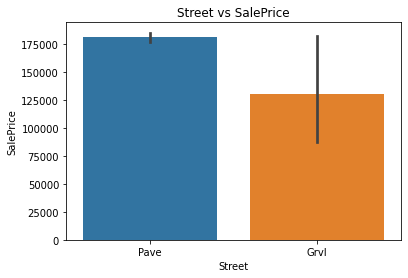

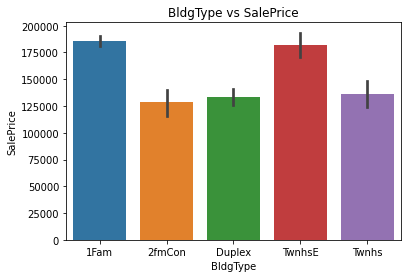

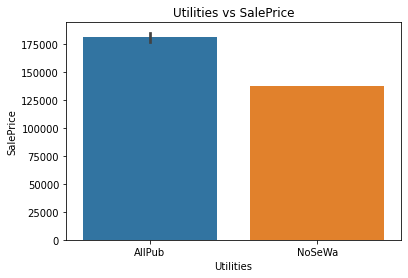

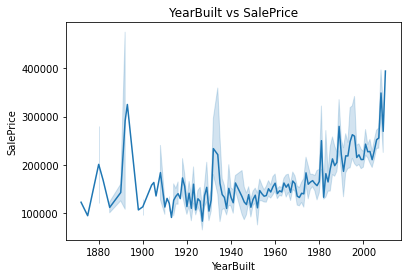

In [ ]:
barplot("Street", "SalePrice")
barplot("BldgType", "SalePrice")
barplot("Utilities", "SalePrice")
lineplot("YearBuilt", "SalePrice")

* As we can see above that the Year Built is positively correlated with the SalePrice, hence, SalePrice increases as the YearBuilt increases.

## Apply Machine Learning

##### Splitting the dataset into train & test data with 75% training data and 25% testing.

In [ ]:
# Splitting in two different ratios to test the performance of ML in different splits.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=1)
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_filtered_scaled, y_scaled, test_size=0.25, random_state=1)

#### This generic function calculates the evaluation metrics for regression model accuracy and errors in the predictions. The following scores are being calculated to evaluate the regression model:
* R2 Score from scikit. It ranges between 0-1. The closer to one the better the model. It mainly shows the accuracy.
* Mean Squared Error. The least the better.
* Root Mean Squared Error. The least the better.

In [ ]:
def calculate_regression_scores(y_test,y_prediction):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    score=r2_score(y_test,y_prediction)
    print(f'r2 score is {score}')
    print(f'mean_sqrd_error is == {mean_squared_error(y_test,y_prediction)}')
    print(f'root_mean_squared error of is == {np.sqrt(mean_squared_error(y_test,y_prediction))}')

#### Applying Regression Algorithms

This method performs the following types of regressions on the given train and test data prepared above:
* Random Forest Regressor
* Support Vector Regressor
* Multiple Linear Regressor
* XGBoost Regressor


Along with training and predicting on the data, it calculates the above mentioned scores by passing in the test and predicted y to the function made above

In [ ]:
# Perform Regressions
import numpy as np
def perform_regressions(X_train, y_train, X_test, y_test):
    print("RandomForestRegressor results")
    RFR = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=13)
    RFR.fit(X_train, y_train)
    y_prediction_1 = RFR.predict(X_test)
    calculate_regression_scores(y_test,y_prediction_1)
    model_score1 = RFR.score(X_test, y_test)
    print(f'Model/Accuracy Score: {model_score1}\n')
    
    print("SupportVectorRegressor results")
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)
    y_prediction_2 = svr.predict(X_test)
    calculate_regression_scores(y_test,y_prediction_2)  
    model_score2 = svr.score(X_test, y_test)
    print(f'Model/Accuracy Score: {model_score2}\n')
    
    print("LinearRegressor results")
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    y_prediction_3 = RFR.predict(X_test)
    calculate_regression_scores(y_test,y_prediction_3)
    model_score3 = LR.score(X_test, y_test)
    print(f'Model/Accuracy Score: {model_score3}\n')
    
    print("XGBoostRegressor results")
    XGBR = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)
    XGBR.fit(X_train, y_train)
    y_prediction_4 = XGBR.predict(X_test)
    calculate_regression_scores(y_test,y_prediction_4)
    model_score4 = XGBR.score(X_test, y_test)
    print(f'Model/Accuracy Score: {model_score4}\n')

This regression is performed on all the 75 columns that were extracted after the EDA and Data cleaning with least correlation between input features. Hence, we can call it the whole data

In [ ]:
perform_regressions(X_train, y_train, X_test, y_test)

RandomForestRegressor results
r2 score is 0.8093273619800907
mean_sqrd_error is == 1.9629204265299436e-05
root_mean_squared error of is == 0.004430485782089751
Model/Accuracy Score: 0.8093273619800903

SupportVectorRegressor results
r2 score is -38.781791277824176
mean_sqrd_error is == 0.004095421950108968
root_mean_squared error of is == 0.06399548382588391
Model/Accuracy Score: -38.781791277824176

LinearRegressor results
r2 score is 0.8093273619800903
mean_sqrd_error is == 1.962920426529948e-05
root_mean_squared error of is == 0.004430485782089756
Model/Accuracy Score: 0.7574015421619701

XGBoostRegressor results
r2 score is -0.00022016262178969903
mean_sqrd_error is == 0.00010296981300654201
root_mean_squared error of is == 0.010147404249685828
Model/Accuracy Score: -0.00022016262178969903



#### Analysis for the whole data with 75 columns:
Random Forest Regressor and Linear Regressor produced the best results out of the 4 regressors with almost similar accuracy R2 score 0f **80%** and very low Mean and Root Mean Squared Errors.

### Applying PCA and then using reduced dimensions in ML

In this case I reduced the dimensions by applying PCA on the dataset and extracting the 3 eigen vectors with the highest eigen values in descending order.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
# perform_classifications(X_train, y_train, X_test, y_test)
perform_regressions(X_train_PCA, y_train, X_test_PCA, y_test)

RandomForestRegressor results
r2 score is 0.8831232825578921
mean_sqrd_error is == 1.2032124715709188e-05
root_mean_squared error of is == 0.0034687353193504386
Model/Accuracy Score: 0.8831232825578916

SupportVectorRegressor results
r2 score is -38.781791277824176
mean_sqrd_error is == 0.004095421950108968
root_mean_squared error of is == 0.06399548382588391
Model/Accuracy Score: -38.781791277824176

LinearRegressor results
r2 score is 0.8831232825578916
mean_sqrd_error is == 1.2032124715709229e-05
root_mean_squared error of is == 0.0034687353193504442
Model/Accuracy Score: 0.6993465126630315

XGBoostRegressor results
r2 score is -0.00022016262178969903
mean_sqrd_error is == 0.00010296981300654201
root_mean_squared error of is == 0.010147404249685828
Model/Accuracy Score: -0.00022016262178969903



#### Analysis for data after applying PCA
Random Forest Regressor and Linear Regressor produced the best results out of the 4 regressors with almost similar accuracy R2 score 0f **88%** and very low Mean and Root Mean Squared Errors.

#### Applying ML on Feature Selected Data 

Just for experimental purposes, I tried to reduce dimensions by Feature Selection method by selecting features on the basis of High correlation with the target variable, that was 20 as mentioned above.

In [ ]:
perform_regressions(X_filtered_train, y_filtered_train, X_filtered_test, y_filtered_test)

RandomForestRegressor results
r2 score is 0.003507091147514463
mean_sqrd_error is == 0.00010258610286152036
root_mean_squared error of is == 0.010128479790250873
Model/Accuracy Score: 0.003507091147515573

SupportVectorRegressor results
r2 score is -38.781791277824176
mean_sqrd_error is == 0.004095421950108968
root_mean_squared error of is == 0.06399548382588391
Model/Accuracy Score: -38.781791277824176

LinearRegressor results
r2 score is 0.003507091147515351
mean_sqrd_error is == 0.00010258610286152027
root_mean_squared error of is == 0.010128479790250867
Model/Accuracy Score: 0.04460473098882756

XGBoostRegressor results
r2 score is -0.00022016262178969903
mean_sqrd_error is == 0.00010296981300654201
root_mean_squared error of is == 0.010147404249685828
Model/Accuracy Score: -0.00022016262178969903



#### Analysis for data after Feature Selection:
In this case, as we can observe that none of the above ML algorithms for Regression could perform well with the worst scores ever! 

### Analysis of ML algorithms for Regression
* The highest accuracy that could be achieved using ML was **88%** and for that I had to perform Dimensionality Reduction using PCA as an additional step before training and chose 3 dimensions.
* The other thing to note is that Support Vector Regressor and XGBoost Regressor surprisingly didn't produce good results in any case 
* Although Multiple Linear Regressor and Random Forest Regressor produced almost similar results and they produced best results in ML out of the 4.

## Applying MCMC using PyMC3

Below code cell performs major steps to prepare data for MCMC:
* As there were 75 columns in the dataset, KDE pair plot wasn't possible at all as it was taking a lot of time to generate and viewing those tiny little graphs wouldn't help.
* Considering the fact that 50% of the data columns were Categorical so they weren't following any distribution, therefore I neglected those columns.
* Another interesting finding during EDA was that the most correlated data columns with the target variable were the Categorical ones so the Feature Selected columns above were useless for us
* MCMC requires the features to be following some distribution, therefore, I hand picked those columns that had random numerical values.
* And I selected three such columns: **GrLivArea, LotArea, TotalBsmtSF**
* There were some outliers that were degrading the shape of our distributions, therefore, I removed those outliers.
* Last but not the least, train test split.

In [ ]:
X_mcmc = X_scaled[['GrLivArea', 'LotArea', 'TotalBsmtSF']]
X_mcmc['SalePrice'] = y_scaled
from scipy import stats
#Removing outliers based on Z scores.
X_mcmc = X_mcmc[(np.abs(stats.zscore(X_mcmc)) < 3).all(axis=1)]
print(X_mcmc.head())
y_scaled = X_mcmc['SalePrice']
X_mcmc.drop(['SalePrice'], axis=1, inplace=True)
X_mean = X_mcmc.mean(axis=0)
X_centered = X_mcmc - X_mean
X_mcmc_train, X_mcmc_test, y_mcmc_train, y_mcmc_test = train_test_split(X_centered, y_scaled, test_size=0.25, random_state=1)
# X_test_mcmc = X[['GrLivArea', 'LotArea', 'TotalBsmtSF']]

   GrLivArea   LotArea  TotalBsmtSF  SalePrice
0   0.008193  0.040484     0.004101   0.998927
1   0.006941  0.052801     0.006941   0.998274
2   0.007979  0.050261     0.004110   0.998511
3   0.012229  0.068019     0.005385   0.997139
4   0.008776  0.056936     0.004572   0.998169


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Produced the KDE pairplot to visualize the distributions of our input features and select relevant distributions as priors and likelihoods.

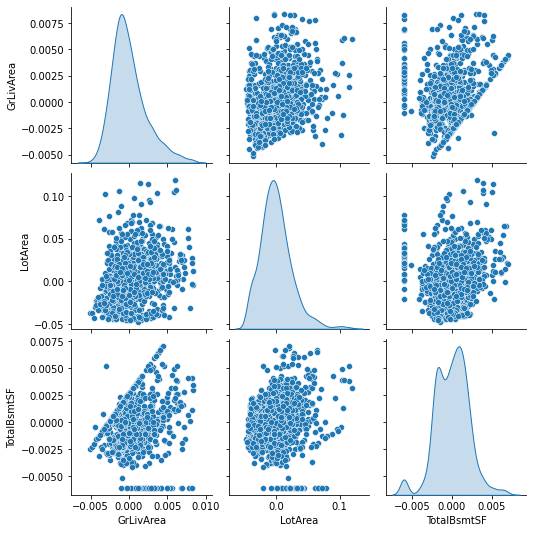

In [ ]:
sns.pairplot(X_centered, diag_kind='kde')

The KDE plot of the GrLivArea, TotalBsmtSF and LotArea shows a Gaussian-like distribution, except for about several dozens of data points that are far away from the mean.

**Prior & Likelihood Selection**

Choosing a PDF to model parameters, prior distribution. This is our best guess about parameters before seeing the data X. KDE plot is used to understand the distribution of prior and KDE plot above of the input features shows a Gaussian-like distribution, except for about several dozens of data points that are far away from the mean

* I want to apply Multiple Linear Regression using MCMC so my linear equation will be:   **y = α + βx**
* According to my equation, I need to set the parameters **α** and **β**.
* As my dataset has 3 features, therefore my x would be a matrix, hence, there would be 3 β's as β is weight of each input variable.
* pm.math.dot performs matrix multiplications between β and x.
* I have selected **priors** for α & β as Normal distributions as our features are also normally distributed.
* The mean is set to zero and Standard deviations for those distributions are randomly chosen as I  don't have much belief about the weights and bias except that it is linear and will ultimately converge.
* **y_pred** is the likelihood function that is set to be Normal distribution with mean **μ** as the linear equation **y = α + βx**.
* The posterior distribution would be for the target variable y as mentioned in likelihood.
* ϵ is the Standard Deviation for the likelihood, therefore it is chosen as HalfCauchy distribution to provide positive values.
* Training data is provided in both x and y in likelihood.
* The y_pred specifies the likelihood. This is the way in which we tell PyMC3 that we want to condition for the unknown on the knows (data).
* The last line draws 2000 posterior samples using NUTS sampling.

In [ ]:
with pm.Model() as model_g:
    # Defining priors
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=3)
    ϵ = pm.HalfCauchy('ϵ', 5)
    # Setting training x data in the model with features key.
    x_ = pm.Data('features', X_mcmc_train) # a data container, can be changed
    μ = α_tmp + pm.math.dot(x_, β)
    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
    #Defining likelihood function
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_mcmc_train)
    trace_mlr = pm.sample(2000)
    

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, β, α_tmp]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 18 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


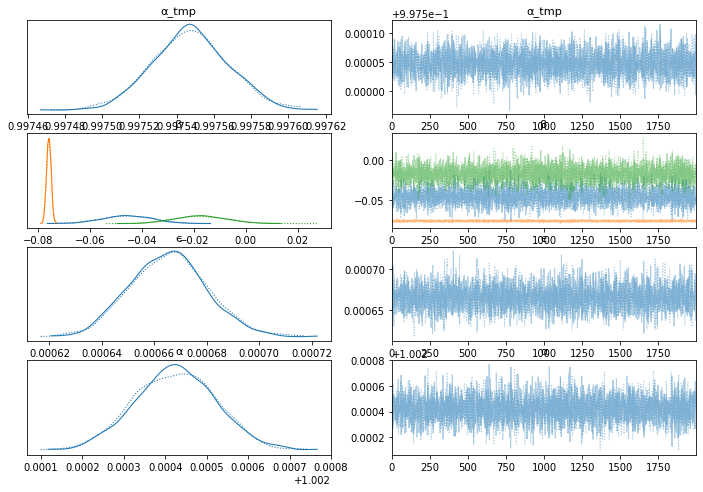

In [ ]:
az.plot_trace(trace_mlr);

*   On the left, we have a KDE plot, — for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.
*   On the right, we get the individual sampled values at each step during the sampling. From the trace plot, we can visually get the plausible values from the posterior.
*  The above plot has one row for each parameter. For this model, the posterior is bi-dimensional, and so the above figure is showing the marginal distributions of each parameter.
*  Our sampling chains for the individual parameters (left) seem well converged and stationary
*  The maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters.



Detailed summary of the posterior distribution for each parameter.
As we can observe that there 3 β's β0, β1 and β2 each representing posterior distribution of weight for each input feature respectively.
* Observing the r_hat values for each parameter, the convergence is on point with r_hat = 1.0

In [ ]:
az.summary(trace_mlr)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp,0.998,0.000,0.998,0.998,0.0,0.0,6782.0,3439.0,1.0
β[0],-0.046,0.010,-0.063,-0.028,0.0,0.0,5743.0,3073.0,1.0
β[1],-0.076,0.001,-0.078,-0.074,0.0,0.0,5591.0,3547.0,1.0
β[2],-0.017,0.010,-0.036,0.001,0.0,0.0,6097.0,3103.0,1.0
ϵ,0.001,0.000,0.001,0.001,0.0,0.0,5733.0,2780.0,1.0
α,1.002,0.000,1.002,1.003,0.0,0.0,6453.0,3226.0,1.0


Visualization of the above summary by generating a plot with the mean and Highest Posterior Density (HPD) of a distribution, and to interpret and report the results of a Bayesian inference.

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb676a74310>,
      dtype=object)

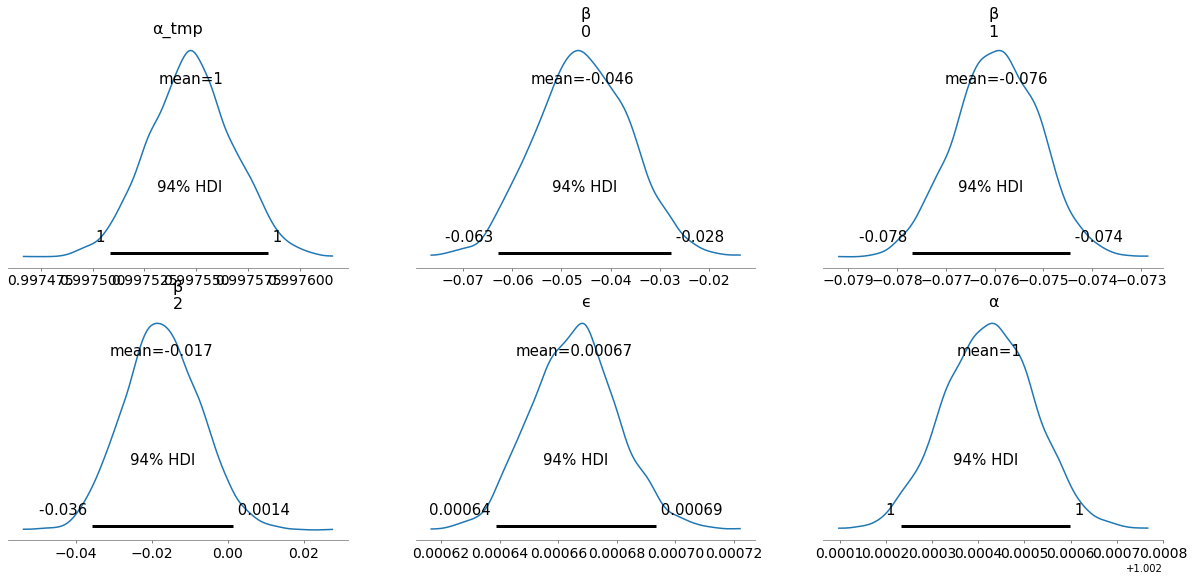

In [ ]:
az.plot_posterior(trace_mlr)

* Unlike ML inference, in Bayesian inference, we are getting the entire distribution of the weights and bias instead of single values.
* It can be interpreted as such that there is 94% probability in the belief.

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  This is separate from the ipykernel package so we can avoid doing imports until
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` withou

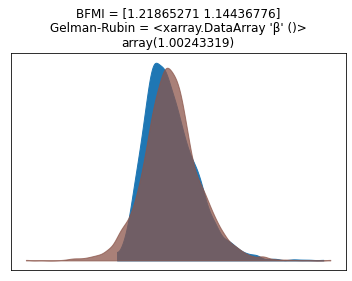

In [ ]:
bfmi = pm.bfmi(trace_mlr)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_mlr).values())
(pm.energyplot(trace_mlr, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

Our model has converged well and the Gelman-Rubin statistic looks fine.

*   Now that we have computed the posterior, we are going to illustrate how to use the simulation results to derive predictions.
*   The following function will randomly draw 1000 samples of parameters from the trace. Then, for each sample, it will draw approx. 400 random numbers from a normal distribution specified by the values of μ and σ in that sample.

/usr/local/lib/python3.7/dist-packages/pymc3/sampling.py:1690: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'mean(x)'),
 Text(0.5, 1.0, 'Posterior predictive of the mean')]

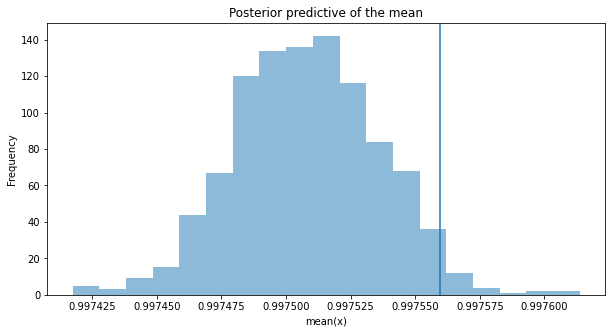

In [ ]:
ppc = pm.sample_posterior_predictive(trace_mlr, samples=1000, model=model_g)
np.asarray(ppc['y_pred']).shape
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y_pred']], bins=19, alpha=0.5)
ax.axvline(y_scaled.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')

As we can see that the mean of data pefectly matches to the mean of the **predicted** Posterior distribution. Although, the actual means does not exactly seem to fit to the center but focusing on numerical values, the mean is the same within 3 decimal place precision.

In [ ]:
with model_g:
    pm.set_data({'features': X_mcmc_test})
    posterior = pm.sample_posterior_predictive(trace_mlr)

#### The above code cell is really important 
It is setting the x test data into the model so that the samples from the posterior distribution could be sampled given the test data instead of train data that was set while training in the same **features** key.

#### The below code cell is the main step for y prediction from MCMC and evaluation with y test
* As the 2000 samples generated above contains approx. 400 values in each sample, therefore we get 2000x400 matrix
* Each sample is a y_prediction sampled from the y posterior distribution above
* y_pred key contains the 2000x400 matrix values
* Then I have taken the mean column wise to take the average of each y prediction from 2000 samples generated.
* y_prediction variable will then contain an averaged 400 y predictions from the 2000 samples generated against each x test value.
* This y_prediction is the MCMC prediction/output of the model
* This is then evaluated with the respective y test values from the dataset using the same general regression score calculator that was also used to evaluate the ML regression models.

In [ ]:
y_prediction = posterior['y_pred'].mean(axis=0)
calculate_regression_scores(y_mcmc_test,y_prediction)

r2 score is 0.8812019461029857
mean_sqrd_error is == 3.500009349984921e-07
root_mean_squared error of is == 0.0005916087685273876


#### MCMC Analysis:
As we can see that accuracy/R2 score is **88%** with very low mean & root mean squared values.

### MCMC vs ML Analysis for Regression & Conclusion:

* MCMC has definitely performed quite well than ML algorithms for regression.
* With only 3 features selected, MCMC was able to provide approximately **88%** accuracy with the least mean and root mean squared values with exponents **-7**
* While for ML feature selection didn't go quite well as seen above. It provided worst results.
* Even with all the features considered in ML, it could only give **80%** accuracy with exponent **-5** in mean and root mean squared values.
* ML algorithm could only perform well when Dimensionality reduction was applied using PCA and choosing 3 dimensions from PCA with **88%** R2 score while still larger mean and root mean squared values, that is, **-5** exponent while MCMC had **-7** exponent.
* ML Algorithms are much easier to implement while MCMC are much tricky, but the results are phenomenal.

## Credit Card Fraud Detection

### Dataset

https://www.kaggle.com/mlg-ulb/creditcardfraud

### Data Cleaning and EDA

In [163]:
# Loading dataset
data = pd.read_csv("creditcard.csv")

In [164]:
print(data.shape)
print(data.head)

(284807, 31)
<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388 

In [165]:
# Getting a bird eye view detail of the dataset
data.describe(include = "all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* The data description was extracted to get a bird eye view of the dataset. This step helped me determine that there were many null/NAN values in the dataset which needed to be handled. Moreover, I got to know that my dataset doesn't contain categorical data columns and an idea of overall distribution of many columns

In [ ]:
check_nulls_in_columns()

Series([], dtype: int64)


Using the above general null check function I created, there are no null values in the dataset

Check for any duplicate records and remove them

In [ ]:
data.duplicated().sum()

1081

In [ ]:
data.drop_duplicates(inplace=True)

Visualizing the class distribution in the dataset

No Frauds
 0    283253
1       473
Name: Class, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


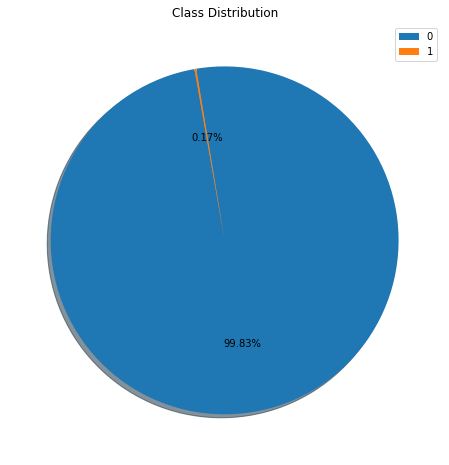

In [ ]:
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(data['Class'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds\n', data['Class'].value_counts())
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

##### This clearly shows that there's a huge class imbalance, therefore I will be undersampling the data to avoid severe overfitting!
No Frauds has a 99.83% of the dataset coverage and the main fraud class is less than 1%

Applying log function to the Amount column to compact the range of the values

<AxesSubplot:ylabel='Frequency'>

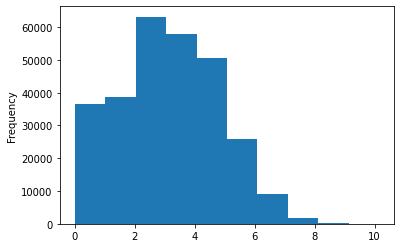

In [ ]:
data['logAmount'] = np.log(data['Amount']+1)
# Plotting histogram
data['logAmount'].sort_values().plot.hist()

To make the amount value lie between 0-1, I'm applying normalization as all other columns are already normalized due to PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time','Amount','logAmount'], axis = 1);

#### Performing undersampling in order to match the Number of fraud rows to non fraud rows. This will help reduce overfitting and class imbalance
* The method used is just randomly choosing the same number of non fraud rows as the fraud rows.

In [ ]:
fraud_data = data[data.Class == 1]
normal_data = data[data.Class == 0]
# Sampling fraud data euivalent count of non fraud data
under_sampled_data = normal_data.sample(len(fraud_data))
# Merging and shuffling the data
frames = [fraud_data, under_sampled_data]
final_data = pd.concat(frames)
from sklearn.utils import shuffle
df = shuffle(final_data)

No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


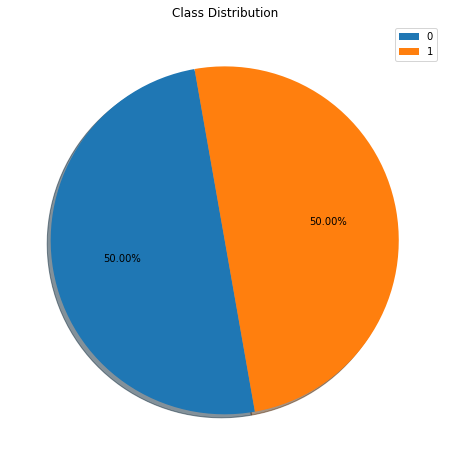

In [ ]:
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(df['Class'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

As we can visualize that the class imbalance is now resolved and we can proceed to next steps.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'V4'),
  Text(1, 0, 'V11'),
  Text(2, 0, 'V2'),
  Text(3, 0, 'V19'),
  Text(4, 0, 'V20'),
  Text(5, 0, 'V8'),
  Text(6, 0, 'V27'),
  Text(7, 0, 'normAmount'),
  Text(8, 0, 'V28'),
  Text(9, 0, 'V21'),
  Text(10, 0, 'V26'),
  Text(11, 0, 'V22'),
  Text(12, 0, 'V25'),
  Text(13, 0, 'V15'),
  Text(14, 0, 'V13'),
  Text(15, 0, 'V23'),
  Text(16, 0, 'V24'),
  Text(17, 0, 'V5'),
  Text(18, 0, 'V6'),
  Text(19, 0, 'V1'),
  Text(20, 0, 'V18'),
  Text(21, 0, 'V7'),
  Text(22, 0, 'V17'),
  Text(23, 0, 'V9'),
  Text(24, 0, 'V3'),
  Text(25, 0, 'V16'),
  Text(26, 0, 'V10'),
  Text(27, 0, 'V12'),
  Text(28, 0, 'V14')])

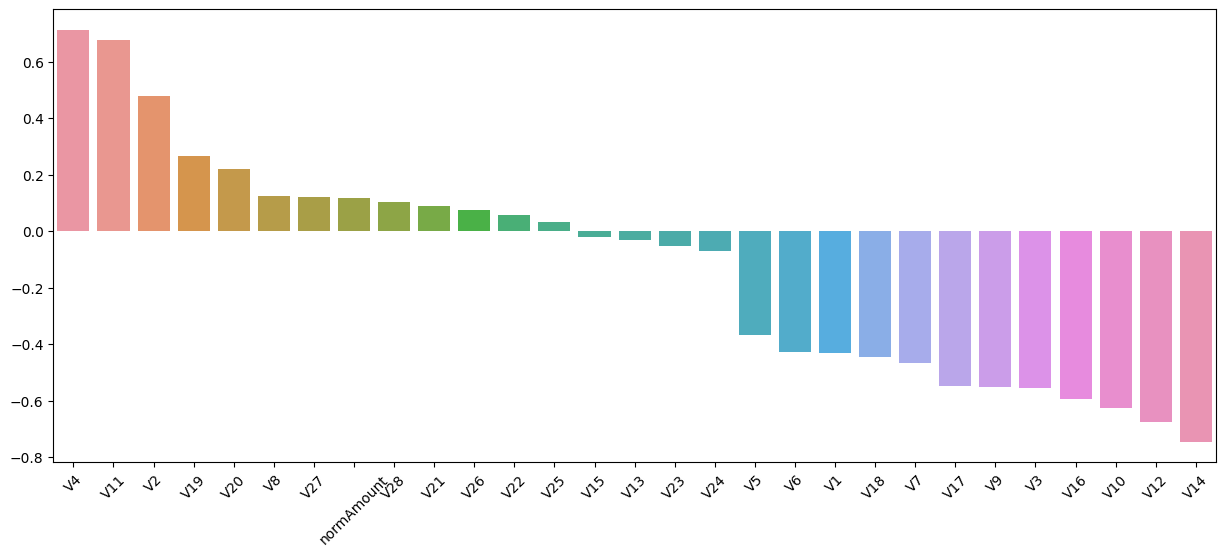

In [ ]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45)

* As we can visualize that V4, V11, V10, V12, V14 are the most correlated positively and negatively with the target variable, so we are gonna use these columns for further steps.

In [7]:
# Separating X & y from dataset
y = df.Class
X = df.drop(columns=["Class"], axis=1)

**Applying Feature Selection using scikit's SelectFromModel with RandomForestClassifier**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)

selected_feat= X.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

8
Index(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


As we can observe that both correlation matrix and Feature selection method are pointing towards the V4, V11, V10, V12, V14 columns, so finally working with these columns.

In [8]:
X = X[['V4', 'V10', 'V11', 'V12', 'V14']]

**Plotting the histogram plot for all the selected columns** 

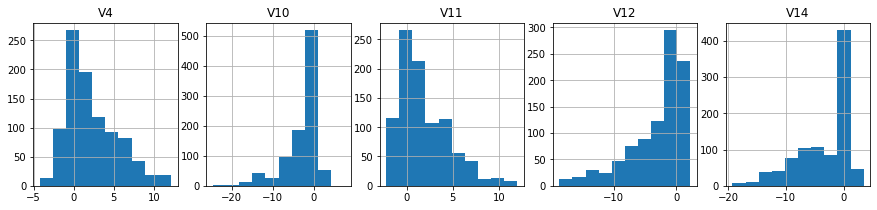

In [ ]:
fig, ax = plt.subplots(1, len(X.columns), figsize=(3*len(X.columns), 3))
for i, var in enumerate(X):
    X[var].hist(ax=ax[i])
    ax[i].set_title(var)
plt.show()

## Apply Machine Learning for Classification

##### The following 3 code cells are functions:

* Below function is used for calculating precision and recall for the predicted classifications by the model

In [202]:
# Get precision and recall
def precision_recall(cm):
    tp_and_fn = cm.sum(1)
    tp_and_fp = cm.sum(0)
    tp = cm.diagonal()

    precision = tp / tp_and_fp
    recall = tp / tp_and_fn
    return precision, recall

* This function is responsible for accuracy, loss and confusion matrix, all of the metrics required for evaluating the model.

In [203]:
# Calculate Classification Metrics
def calculate_classification_metrics(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    precision, recall = precision_recall(cm)
    accuracy = accuracy_score(y_test, y_predict)
    loss = log_loss(y_test, y_predict)
    print(f'Confusion Matrix: {cm}\nPrecision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}\nLoss: {loss}')

#### This is the function used to apply the following classification algorthms:
* Random Forest Classifier
* XGBoost CLassifier
* Support Vector Classifier 
* Logistic Regression

It also calls the above functions to evaluate each model

In [204]:
# Perform Classifications
def perform_classifications(X_train, y_train, X_test, y_test):
    model1 = RandomForestClassifier()
    model1.fit(X_train, y_train)
    y_predict = model1.predict(X_test)
    print('Random Forest\n')
    calculate_classification_metrics(y_test, y_predict)
    
    model2 = XGBClassifier()
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)
#     predictions = [round(value) for value in y_pred]
    print('XGBoost\n')
    calculate_classification_metrics(y_test, y_pred)
    
    clf = svm.SVC(kernel='linear') # Linear Kernel
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('SVM\n')
    calculate_classification_metrics(y_test, y_pred)
    
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train, y_train)
    predictions = logisticRegr.predict(X_test)
    print('Logistic Regression\n')
    calculate_classification_metrics(y_test, predictions)

In [ ]:
# Splitting data into train and test with 75% train and 25% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
perform_classifications(X_train, y_train, X_test, y_test)

Random Forest

Confusion Matrix: [[125   1]
 [  8 103]]
Precision: [0.93984962 0.99038462]
Recall: [0.99206349 0.92792793]
Accuracy: 0.9620253164556962
Loss: 1.3116024774330233
[19:48:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost

Confusion Matrix: [[121   5]
 [  7 104]]
Precision: [0.9453125  0.95412844]
Recall: [0.96031746 0.93693694]
Accuracy: 0.9493670886075949
Loss: 1.7488156739497016
SVM

Confusion Matrix: [[125   1]
 [ 10 101]]
Precision: [0.92592593 0.99019608]
Recall: [0.99206349 0.90990991]
Accuracy: 0.9535864978902954
Loss: 1.6030689449006237
Logistic Regression

Confusion Matrix: [[124   2]
 [ 10 101]]
Precision: [0.92537313 0.98058252]
Recall: [0.98412698 0.90990991]
Accuracy: 0.9493670886075949
Loss: 1.7488055524632435


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Analysis of ML algorithms for Classification
* The highest accuracy that could be achieved using ML was **96%** with the highest precision & recall values.
* Although other 3 algorithms have also performed really well for this dataset.
* I performed Feature Selection using Feature selection algorithm and Correlation matrix to reduce the dimensions in this case

## Applying MCMC using PyMC3

Making a KDE plot to visualize the distributions of the columns and select any 2 of them for MCMC.

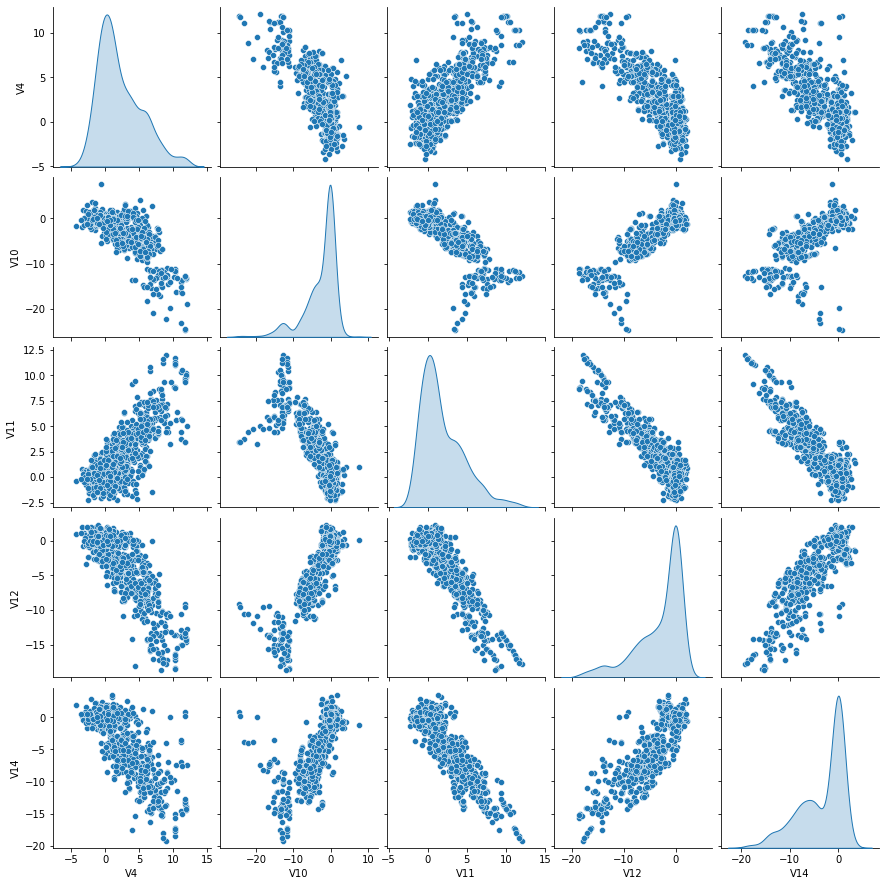

In [9]:
sns.pairplot(X, diag_kind='kde')

* I would be choosing **V4** and **V11** columns for my further analysis.
* Both of the columns represent a **Gamma** like distribution shape in the above KDE plot

**Prior & Likelihood Selection**

Choosing a PDF to model parameters, prior distribution. This is our best guess about parameters before seeing the data X. KDE plot is used to understand the distribution of prior and KDE plot above of the input features shows a Gamma-like distribution, except for about several dozens of data points that are far away from the mean

* I want to apply Logistic Regression using MCMC so my equation will be:   **y = 1/(1 + e^-(α + βx))**
* According to my equation, I need to set the parameters **α** and **β**.
* As my dataset has 2 features, therefore my x would be a matrix, hence, there would be 2 β's as β is weight of each input variable.
* pm.math.dot performs matrix multiplications between β and x.
* I have selected **priors** for α & β as Gamma distributions as our features are also normally distributed.
* The mean is set to zero and Standard deviations for those distributions are randomly chosen as I  don't have much belief about the weights and bias except that it is linear and will ultimately converge.
* **yl** is the likelihood function that is set to be Normal distribution with mean **μ** as the linear equation **y = 1/(1 + e^-(α + βx))**.
* The posterior distribution would be for the target variable y as mentioned in likelihood.
* ϵ is the Standard Deviation for the likelihood, therefore it is chosen as HalfCauchy distribution to provide positive values.
* bd variable is an additional parameter which is used for **decision boundary** distribution for logistic regression
* Training data is provided in both x and y in likelihood.
* The y_pred specifies the likelihood. This is the way in which we tell PyMC3 that we want to condition for the unknown on the knows (data).
* The last line draws 2000 posterior samples using NUTS sampling.

In [10]:
X = X[['V4', 'V11']]
# Splitting data into train and test with 75% train and 25% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [11]:
with pm.Model() as model_1:
    α = pm.Normal('α',  mu=0, sd=10)
    β = pm.Normal('β',  mu=0, sd=2, shape=2)
    # Setting training x data in the model with features key.
    x_ = pm.Data('features', X_train) # a data container, can be changed
    μ = α + pm.math.dot(x_, β)
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_[:,0])
    yl = pm.Bernoulli('yl', p=θ, observed=y_train)
    trace_1 = pm.sample(2000)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  # Remove the CWD from sys.path while we load stuff.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 16 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


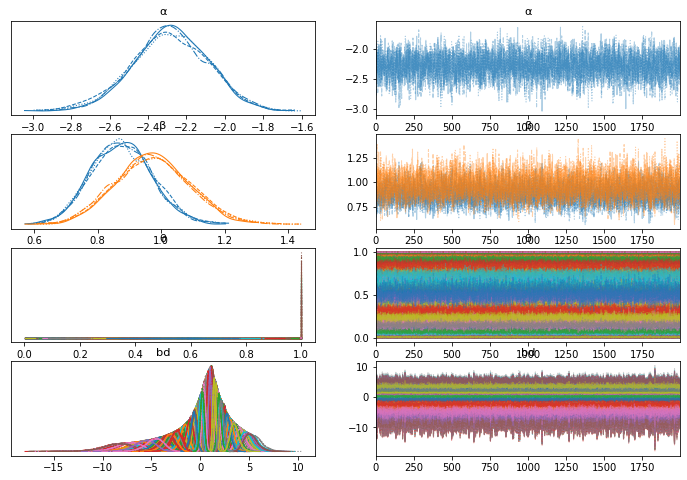

In [ ]:
az.plot_trace(trace_1);

*   On the left, we have a KDE plot, — for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.
*   On the right, we get the individual sampled values at each step during the sampling. From the trace plot, we can visually get the plausible values from the posterior.
*  The above plot has one row for each parameter. For this model, the posterior is bi-dimensional, and so the above figure is showing the marginal distributions of each parameter.
*  Our sampling chains for the individual parameters (left) seem well converged and stationary
*  The maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters.



Detailed summary of the posterior distribution for each parameter.
As we can observe that there 2 β's β0 and β1 each representing posterior distribution of weight for each input feature respectively.
* The other bd parameters are the decision boundary parameters for logistic regression.
* Observing the r_hat values for each parameter, the convergence is on point with r_hat = 1.0

In [ ]:
az.summary(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,-2.285,0.197,-2.654,-1.912,0.003,0.002,3669.0,4493.0,1.0
β[0],0.876,0.096,0.692,1.050,0.001,0.001,4391.0,5151.0,1.0
β[1],0.974,0.118,0.752,1.190,0.002,0.001,4920.0,4944.0,1.0
θ[0],0.071,0.014,0.046,0.099,0.000,0.000,3583.0,4073.0,1.0
θ[1],0.581,0.065,0.454,0.696,0.001,0.001,6633.0,5920.0,1.0
...,...,...,...,...,...,...,...,...,...
bd[704],-5.760,1.117,-7.929,-3.796,0.015,0.011,5819.0,5071.0,1.0
bd[705],5.219,0.700,3.969,6.549,0.009,0.006,6001.0,5096.0,1.0
bd[706],-4.712,0.948,-6.499,-3.006,0.012,0.009,5824.0,4906.0,1.0
bd[707],2.188,0.241,1.744,2.641,0.003,0.002,6815.0,5995.0,1.0


Visualization of the above summary by generating a plot with the mean and Highest Posterior Density (HPD) of a distribution, and to interpret and report the results of a Bayesian inference.

Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1421) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'β\n0'}>,
        <AxesSubplot:title={'center':'β\n1'}>,
        <AxesSubplot:title={'center':'θ\n0'}>],
       [<AxesSubplot:title={'center':'θ\n1'}>,
        <AxesSubplot:title={'center':'θ\n2'}>,
        <AxesSubplot:title={'center':'θ\n3'}>,
        <AxesSubplot:title={'center':'θ\n4'}>],
       [<AxesSubplot:title={'center':'θ\n5'}>,
        <AxesSubplot:title={'center':'θ\n6'}>,
        <AxesSubplot:title={'center':'θ\n7'}>,
        <AxesSubplot:title={'center':'θ\n8'}>],
       [<AxesSubplot:title={'center':'θ\n9'}>,
        <AxesSubplot:title={'center':'θ\n10'}>,
        <AxesSubplot:title={'center':'θ\n11'}>,
        <AxesSubplot:title={'center':'θ\n12'}>],
       [<AxesSubplot:title={'center':'θ\n13'}>,
        <AxesSubplot:title={'center':'θ\n14'}>,
        <AxesSubplot:title={'center':'θ\n15'}>,
        <AxesSubplot:title={'center':'θ\n16'}>],
       [<AxesSubplot:title={'center':'θ\n17'}>,
   

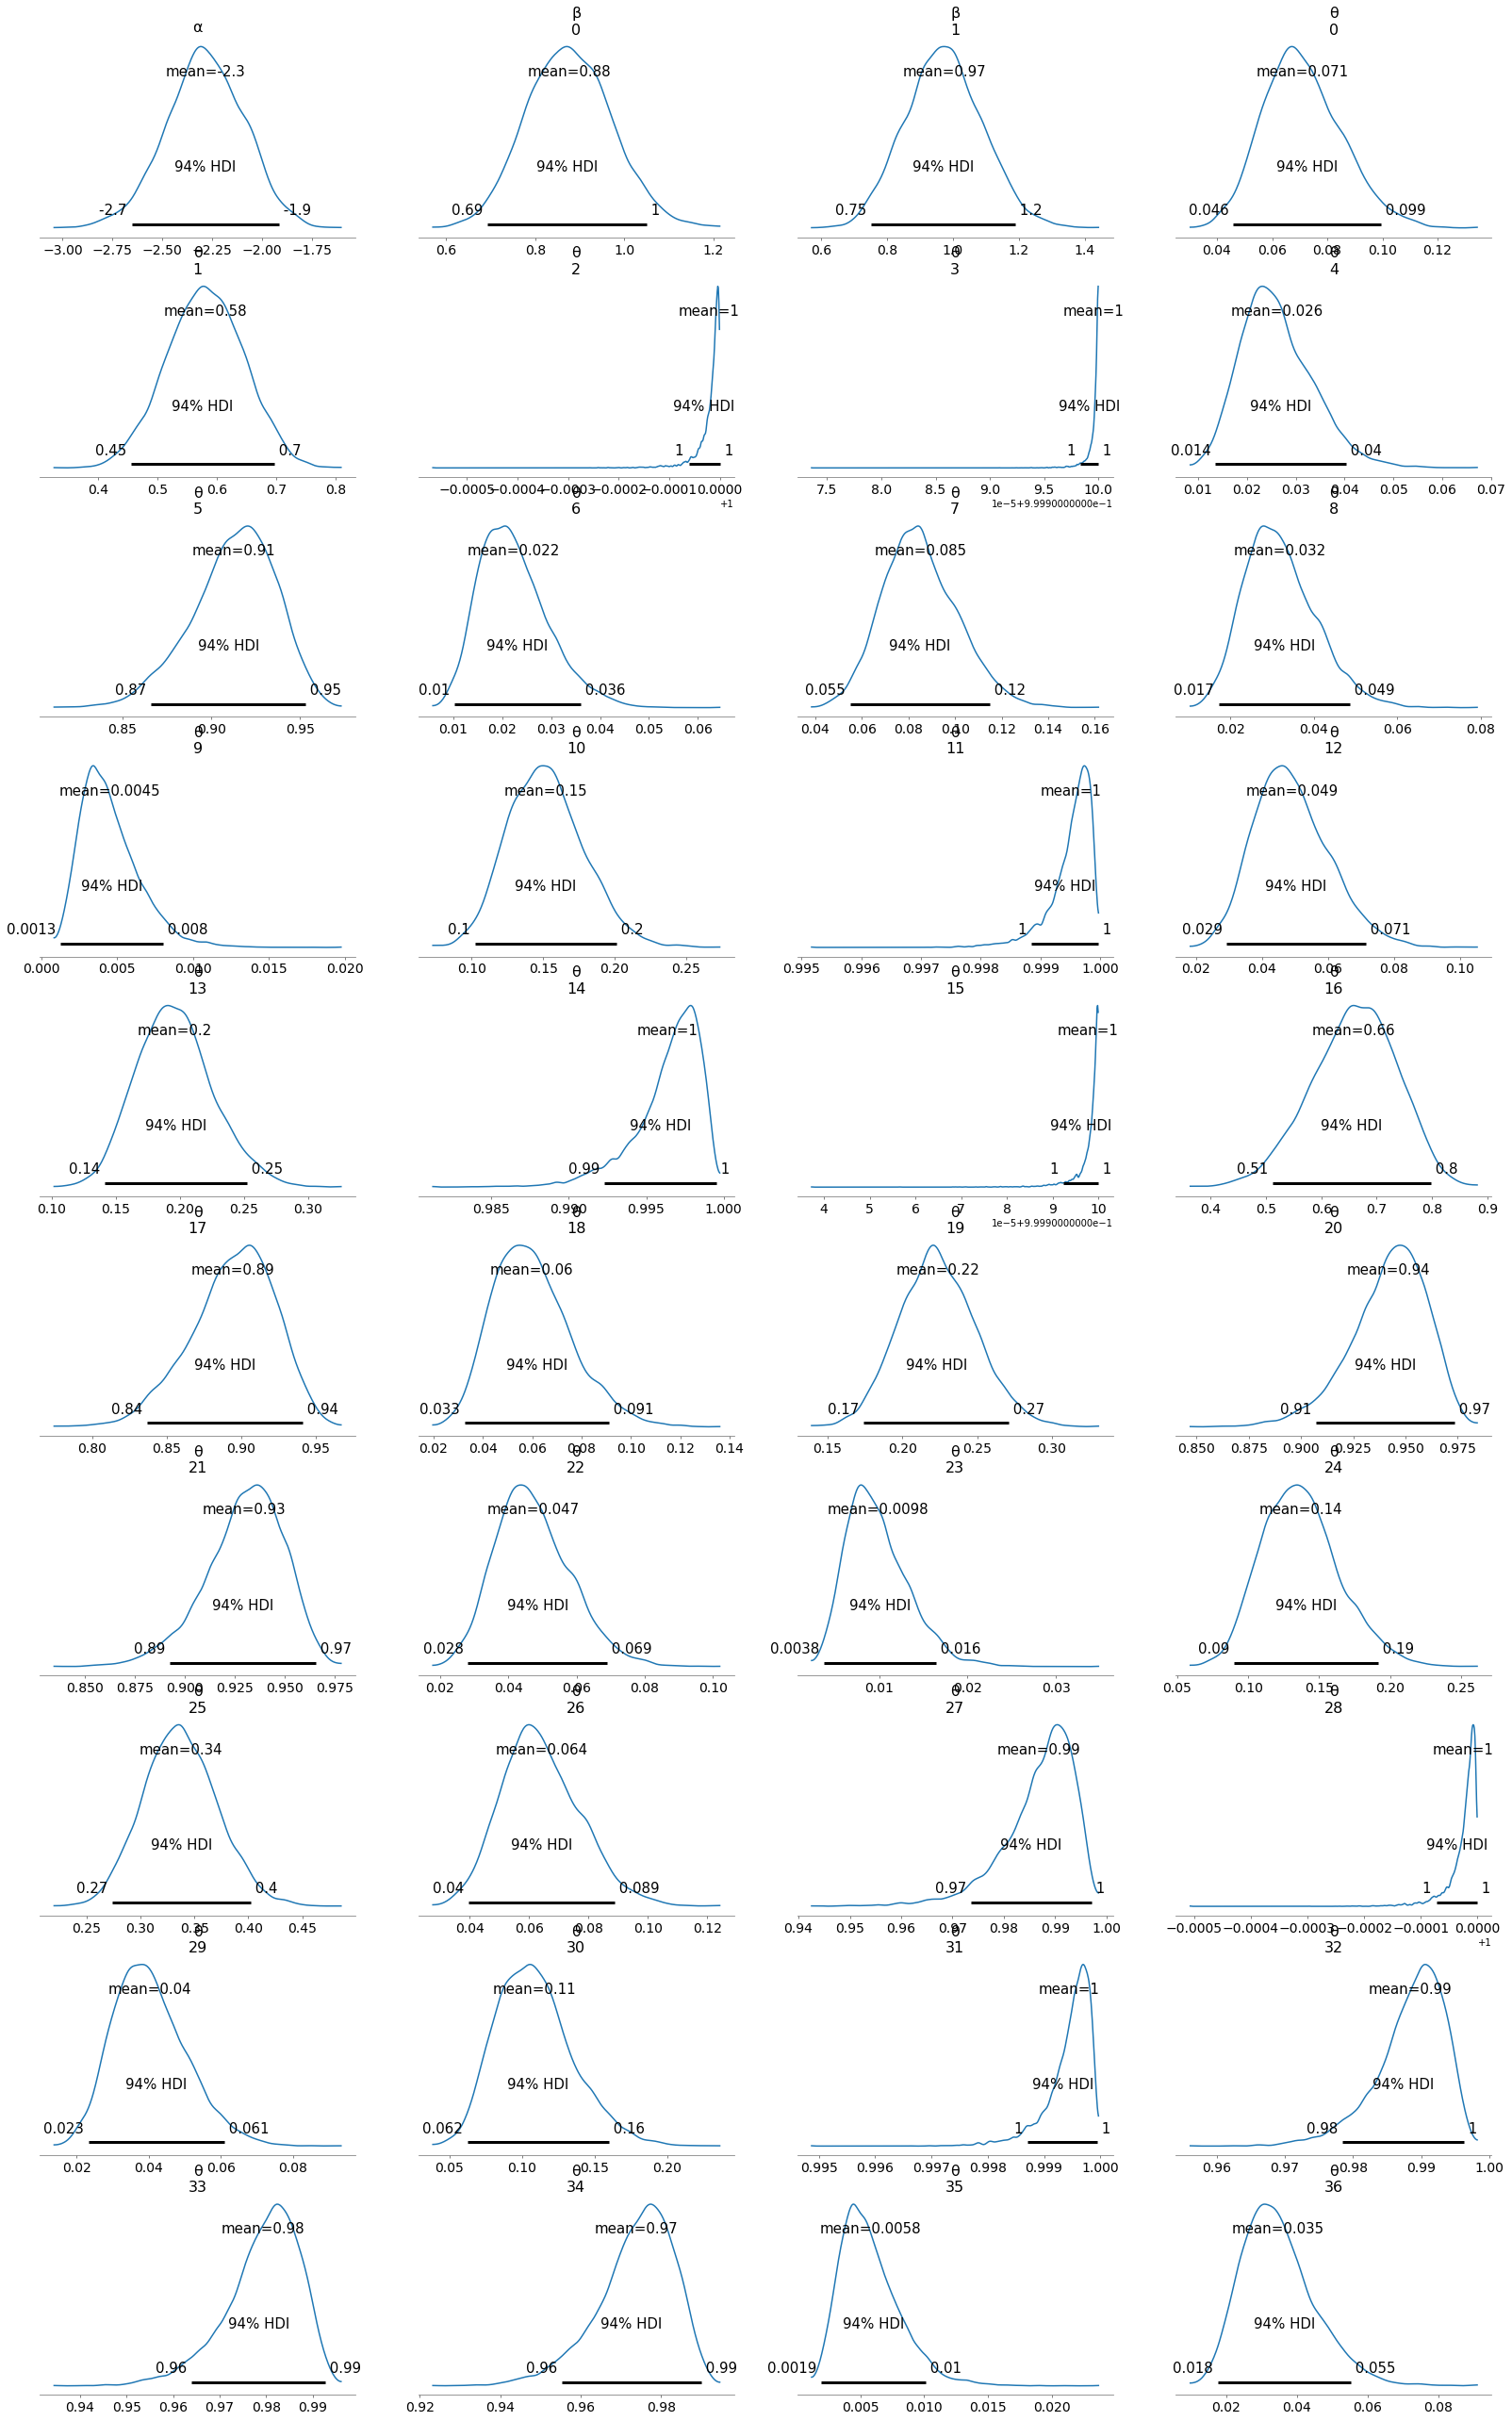

In [ ]:
az.plot_posterior(trace_1)

* Unlike ML inference, in Bayesian inference, we are getting the entire distribution of the weights and bias instead of single values.
* It can be interpreted as such that there is 94% probability in the belief.

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  This is separate from the ipykernel package so we can avoid doing imports until
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` withou

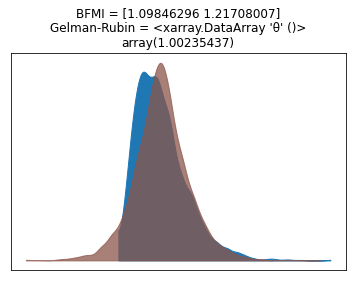

In [12]:
bfmi = pm.bfmi(trace_1)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_1).values())
(pm.energyplot(trace_1, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

Our model has converged well and the Gelman-Rubin statistic looks fine.

*   Now that we have computed the posterior, we are going to illustrate how to use the simulation results to derive predictions.
*   The following function will randomly draw 1000 samples of parameters from the trace. Then, for each sample, it will draw approx. 250 random numbers from a normal distribution specified by the values of μ and σ in that sample.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


[Text(0.5, 1.0, 'Posterior predictive of the mean'),
 Text(0.5, 0, 'mean(x)'),
 Text(0, 0.5, 'Frequency')]

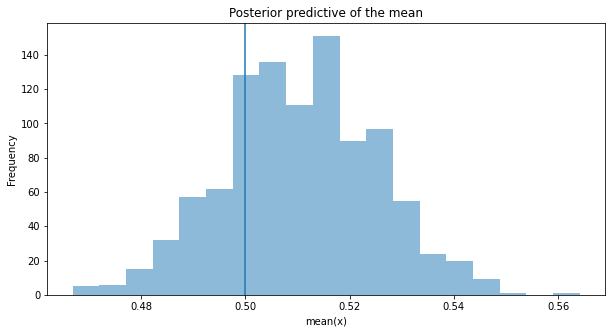

In [ ]:
ppc = pm.sample_posterior_predictive(trace_1, samples=1000, model=model_1)
np.asarray(ppc['yl']).shape
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['yl']], bins=19, alpha=0.5)
ax.axvline(y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')

As we can see that the mean of data pefectly matches to the mean of the **predicted** Posterior distribution. Although, the actual mean does not exactly seem to fit to the center but focusing on numerical values, the mean is the same within 1 decimal place precision.

In [ ]:
with model_1:
    pm.set_data({'features': X_test})
    posterior = pm.sample_posterior_predictive(trace_1)

#### The above code cell is really important 
It is setting the x test data into the model so that the samples from the posterior distribution could be sampled given the test data instead of train data that was set while training in the same **features** key.

#### The below code cell is the main step for y prediction from MCMC and evaluation with y test
* As the 2000 samples generated above contains approx. 250 values in each sample, therefore we get 2000x250 matrix
* Each sample is a y_prediction sampled from the y posterior distribution above
* y_pred key contains the 2000x250 matrix values
* Then I have taken the mean column wise to take the average of each y prediction from 2000 samples generated.
* y_prediction variable will then contain an averaged 250 y predictions from the 2000 samples generated against each x test value.
* This y_prediction is the MCMC prediction/output of the model
* As this y predictions would be continous values between 0-1 and we need discrete class labels, i.e, 0 or 1 for classification. Therefore, I have thresholded each value with 0.5 to 0 or 1.
* The result is then evaluated with the respective y test values from the dataset using the same general classification score calculator that was also used to evaluate the ML classification models.

In [ ]:
y_prediction = posterior['yl'].mean(axis=0)
y_prediction_thresholded = []
for y in y_prediction:
    if y < 0.5: y_prediction_thresholded.append(0)
    else: y_prediction_thresholded.append(1)
y_prediction_thresholded = np.array(y_prediction_thresholded)
calculate_classification_metrics(y_test, y_prediction_thresholded)

Confusion Matrix: [[119   7]
 [  9 102]]
Precision: [0.9296875  0.93577982]
Recall: [0.94444444 0.91891892]
Accuracy: 0.9324894514767933
Loss: 2.3317553565425424


#### MCMC Analysis:
As we can see that accuracy of classification is **93.2%** with more than **90%** precision and recall values.

### MCMC vs ML Analysis for Classification & Conclusion:

* In this case, ML algorithms for classification has definitely performed better than MCMC but the difference is not much significant.
* With only 2 features selected, MCMC was able to provide approximately **93%** accuracy with the precision and recall values greater than **90%**
* After 5 features selected for ML, it performed quite well with **96%** accuracy with the precision and recall values greater than **92%**. 
* RandomForest Classifier performed the best out of 4 but all the other classifiers also performed really well.

## Marketing Campaign Detection

### Dataset

https://www.kaggle.com/rodsaldanha/arketing-campaign

### Data Cleaning and EDA

In [234]:
# Loading dataset
data = pd.read_csv("marketing_campaign.csv", delimiter=';')

In [235]:
print(data.shape)
print(data.head)

(2240, 29)
<bound method NDFrame.head of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-

In [236]:
# Getting a bird eye view detail of the dataset
data.describe(include = "all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,2012-08-31,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [237]:
df_cleaned = data.copy()

del df_cleaned['Z_CostContact']
del df_cleaned['Z_Revenue']

In [238]:
#create account age
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'])
df_cleaned['Dt_Customer_year_month'] = df_cleaned['Dt_Customer'].dt.to_period("M")
df_cleaned['account_age'] = (pd.to_datetime("2014-12").year - df_cleaned['Dt_Customer_year_month'].dt.year)*12 + (pd.to_datetime("2014-12").month - df_cleaned['Dt_Customer_year_month'].dt.month)

In [239]:
del df_cleaned['Dt_Customer_year_month']
del df_cleaned['Dt_Customer']
df_cleaned.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,1,27
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,0,16
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,10
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,0,11


In [240]:
# create customer age
df_cleaned['Age'] = 2014 - df_cleaned["Year_Birth"]
del df_cleaned['Year_Birth']
df_cleaned.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,27,57
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,9,60
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,16,49
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,10,30
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,11,33


In [241]:
data = df_cleaned
data.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age,Age
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,17.195089,45.194196
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,6.639904,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,37.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,44.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,55.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000,121.000000


In [242]:
check_nulls_in_columns()

Income    2216
dtype: int64


In [243]:
# Fillna in Income by using avg value

avg_income = np.mean(data.Income)

data['Income'] = data['Income'].fillna(avg_income, axis = 0)

In [229]:
X = data
encode_categorical_values()

In [222]:
#Normalizing the data
X_scaled = normalize_columns()
y_scaled = X_scaled.Response
X_scaled = X_scaled.drop(columns=["Response"], axis=1)

No Frauds
 0    1906
1     334
Name: Response, dtype: int64
No Frauds 85.09 % of the dataset
Frauds 14.91 % of the dataset


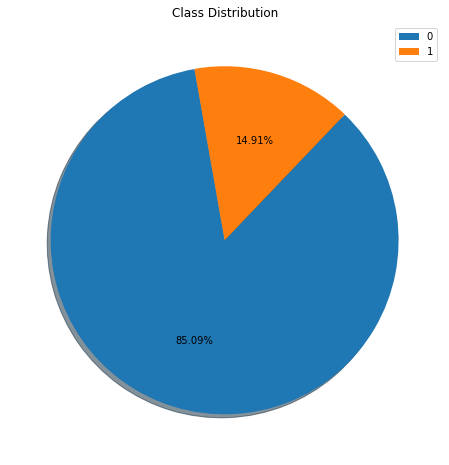

In [188]:
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(X['Response'].value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds\n', X['Response'].value_counts())
print('No Frauds', round(X['Response'].value_counts()[0]/len(X) * 100,2), '% of the dataset')
print('Frauds', round(X['Response'].value_counts()[1]/len(X) * 100,2), '% of the dataset')

In [244]:
fraud_data = data[data.Response == 1]
normal_data = data[data.Response == 0]
# Sampling fraud data euivalent count of non fraud data
under_sampled_data = normal_data.sample(len(fraud_data))
# Merging and shuffling the data
frames = [fraud_data, under_sampled_data]
final_data = pd.concat(frames)
from sklearn.utils import shuffle
df = shuffle(final_data)

In [245]:
y = df.Response
X = df.drop(columns=["Response"], axis=1)
encode_categorical_values()

In [246]:
#Normalizing the data
X_scaled = normalize_columns()

No Frauds
 0    334
1    334
Name: Response, dtype: int64
No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


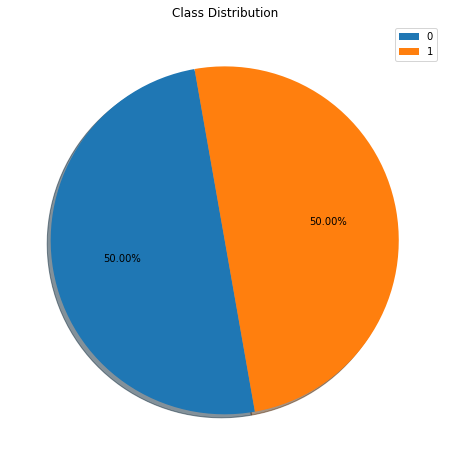

In [249]:
plt.figure(figsize=(8,8))

explode = [0,0.001]
plt.pie(y.value_counts(), explode=explode,autopct='%1.2f%%', shadow=True,startangle=100)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');

print('No Frauds\n', y.value_counts())
print('No Frauds', round(y.value_counts()[0]/len(y) * 100,2), '% of the dataset')
print('Frauds', round(y.value_counts()[1]/len(y) * 100,2), '% of the dataset')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'AcceptedCmp5'),
  Text(1, 0, 'NumCatalogPurchases'),
  Text(2, 0, 'MntWines'),
  Text(3, 0, 'AcceptedCmp3'),
  Text(4, 0, 'account_age'),
  Text(5, 0, 'AcceptedCmp1'),
  Text(6, 0, 'MntMeatProducts'),
  Text(7, 0, 'NumWebPurchases'),
  Text(8, 0, 'Income'),
  Text(9, 0, 'AcceptedCmp4'),
  Text(10, 0, 'AcceptedCmp2'),
  Text(11, 0, 'MntGoldProds'),
  Text(12, 0, 'MntFruits'),
  Text(13, 0, 'MntFishProducts'),
  Text(14, 0, 'MntSweetProducts'),
  Text(15, 0, 'Education'),
  Text(16, 0, 'NumStorePurchases'),
  Text(17, 0, 'Complain'),
  Text(18, 0, 'NumWebVisitsMonth'),
  Text(19, 0, 'NumDealsPurchases'),
  Text(20, 0, 'Age'),
  Text(21, 0, 'Marital_Status'),
  Text(22, 0, 'ID'),
  Text(23, 0, 'Kidhome'),
  Text(24, 0, 'Teenhome'),
  Text(25, 0, 'Recency')])

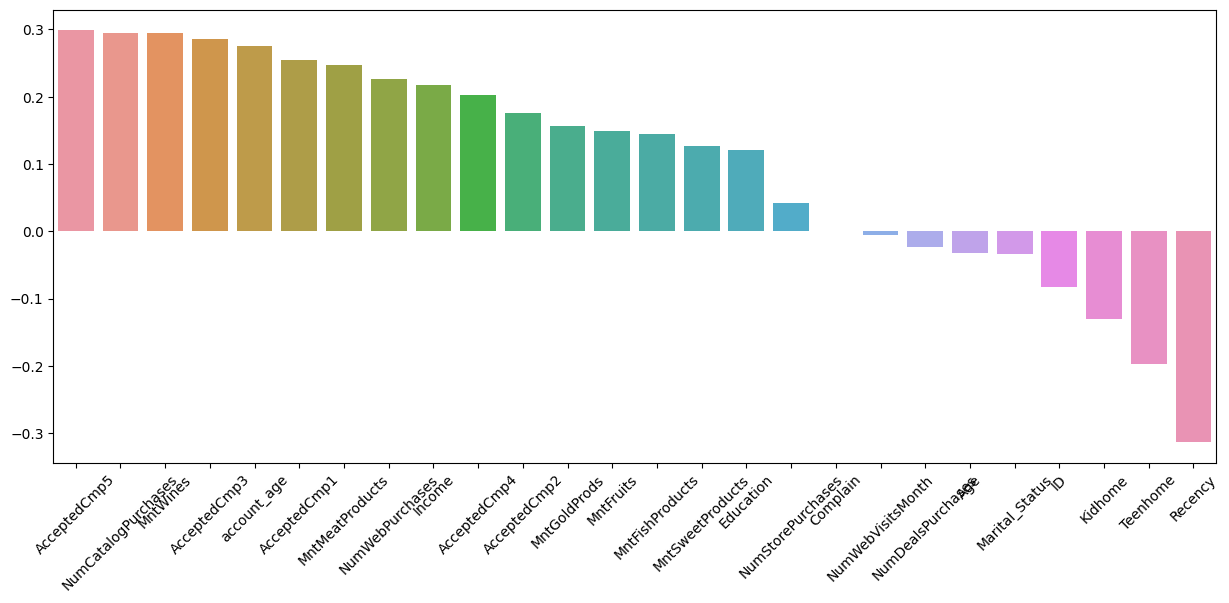

In [200]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = X.corr()["Response"].drop(index="Response").sort_values(ascending=False).index,
            y = X.corr()["Response"].drop(index="Response").sort_values(ascending=False).values)
plt.xticks(rotation = 45)

As we can observe that the correlation is higher with categorical data columns, therefore we will have to handpick columns on the basis of random numerical columns with high correlation values.

**Applying Feature Selection using scikit's SelectFromModel with RandomForestClassifier**

In [212]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_scaled, y)

selected_feat= X_scaled.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

10
Index(['Recency', 'MntWines', 'MntMeatProducts', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'account_age'],
      dtype='object')


In [250]:
X_scaled = X_scaled[['Recency', 'MntWines', 'MntMeatProducts', 'account_age']]

**Plotting the histogram plot for all the selected columns** 

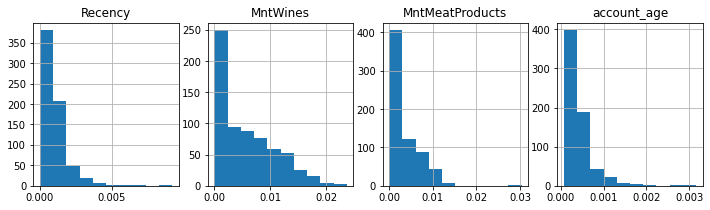

In [214]:
fig, ax = plt.subplots(1, len(X_scaled.columns), figsize=(3*len(X_scaled.columns), 3))
for i, var in enumerate(X_scaled):
    X_scaled[var].hist(ax=ax[i])
    ax[i].set_title(var)
plt.show()

## Apply Machine Learning for Classification

In [251]:
# Splitting data into train and test with 75% train and 25% train data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

#### Performing ML on feature selected data

In [216]:
perform_classifications(X_train, y_train, X_test, y_test)

Random Forest

Confusion Matrix: [[56 34]
 [20 57]]
Precision: [0.73684211 0.62637363]
Recall: [0.62222222 0.74025974]
Accuracy: 0.6766467065868264
Loss: 11.168389890046727
[01:39:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost

Confusion Matrix: [[56 34]
 [24 53]]
Precision: [0.7       0.6091954]
Recall: [0.62222222 0.68831169]
Accuracy: 0.6526946107784432
Loss: 11.995665971361953
SVM

Confusion Matrix: [[ 0 90]
 [ 0 77]]
Precision: [       nan 0.46107784]
Recall: [0. 1.]
Accuracy: 0.46107784431137727
Loss: 18.614142750363346
Logistic Regression

Confusion Matrix: [[ 0 90]
 [ 0 77]]
Precision: [       nan 0.46107784]
Recall: [0. 1.]
Accuracy: 0.46107784431137727
Loss: 18.614142750363346


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


#### Performing ML on all feature data

In [220]:
perform_classifications(X_train, y_train, X_test, y_test)

Random Forest

Confusion Matrix: [[62 28]
 [15 62]]
Precision: [0.80519481 0.68888889]
Recall: [0.68888889 0.80519481]
Accuracy: 0.7425149700598802
Loss: 8.893351938378473
[01:43:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost

Confusion Matrix: [[62 28]
 [12 65]]
Precision: [0.83783784 0.69892473]
Recall: [0.68888889 0.84415584]
Accuracy: 0.7604790419161677
Loss: 8.272894877392051
SVM

Confusion Matrix: [[ 9 81]
 [ 3 74]]
Precision: [0.75       0.47741935]
Recall: [0.1        0.96103896]
Accuracy: 0.49700598802395207
Loss: 17.373185536313432
Logistic Regression

Confusion Matrix: [[31 59]
 [18 59]]
Precision: [0.63265306 0.5       ]
Recall: [0.34444444 0.76623377]
Accuracy: 0.5389221556886228
Loss: 15.925347057823377


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### Analysis of ML algorithms for Classification
* The highest accuracy that could be achieved using ML was **76%** with the highest precision & recall values.
* Although other 2 algorithms have performed really poor for this dataset.
* I performed Feature Selection using Feature selection algorithm and Correlation matrix to reduce the dimensions in this case
* But feature selection seemed to deteriorate the results.
* Random Forest and XGBoost Classifiers performed better but ot up to the mark.

## Applying MCMC using PyMC3

Making a KDE plot to visualize the distributions of the columns and select any 2 of them for MCMC.

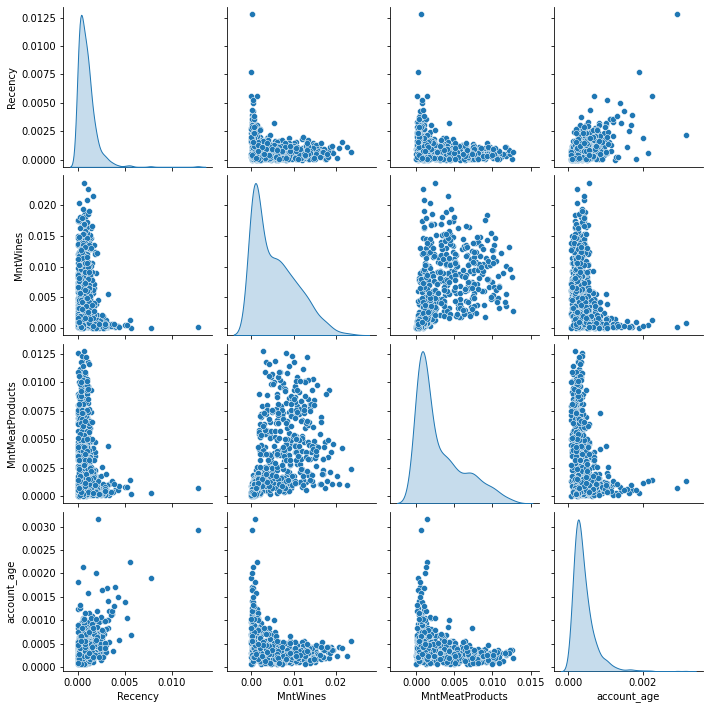

In [252]:
sns.pairplot(X_scaled, diag_kind='kde')

In [254]:
with pm.Model() as model_1:
    α = pm.Normal('α',  mu=0, sd=10)
    β = pm.Normal('β',  mu=0, sd=2, shape=4)
    # Setting training x data in the model with features key.
    x_ = pm.Data('features', X_train) # a data container, can be changed
    μ = α + pm.math.dot(x_, β)
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_[:,0])
    yl = pm.Bernoulli('yl', p=θ, observed=y_train)
    trace_1 = pm.sample(2000)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


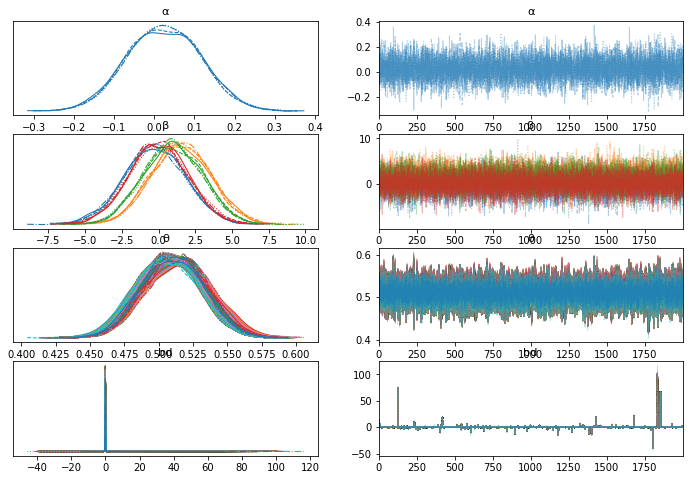

In [255]:
az.plot_trace(trace_1);

*   On the left, we have a KDE plot, — for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.
*   On the right, we get the individual sampled values at each step during the sampling. From the trace plot, we can visually get the plausible values from the posterior.
*  The above plot has one row for each parameter. For this model, the posterior is bi-dimensional, and so the above figure is showing the marginal distributions of each parameter.
*  Our sampling chains for the individual parameters (left) seem well converged and stationary
*  The maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters.



Detailed summary of the posterior distribution for each parameter.
As we can observe that there 2 β's β0 and β1 each representing posterior distribution of weight for each input feature respectively.
* The other bd parameters are the decision boundary parameters for logistic regression.
* Observing the r_hat values for each parameter, the convergence is on point with r_hat = 1.0

In [256]:
az.summary(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.024,0.090,-0.146,0.190,0.001,0.001,14881.0,6791.0,1.0
β[0],-0.262,2.066,-4.032,3.759,0.017,0.023,15284.0,6329.0,1.0
β[1],1.523,2.012,-2.311,5.225,0.016,0.017,16094.0,6288.0,1.0
β[2],0.953,2.008,-2.806,4.595,0.016,0.020,14955.0,6454.0,1.0
β[3],-0.005,2.014,-3.804,3.788,0.016,0.025,16040.0,5702.0,1.0
...,...,...,...,...,...,...,...,...,...
bd[496],0.032,1.966,-0.337,0.388,0.026,0.018,6936.0,7519.0,1.0
bd[497],0.032,1.955,-0.362,0.357,0.025,0.018,6933.0,7458.0,1.0
bd[498],0.032,1.959,-0.401,0.320,0.026,0.018,6934.0,7457.0,1.0
bd[499],0.032,1.965,-0.396,0.327,0.026,0.018,6937.0,7426.0,1.0


Visualization of the above summary by generating a plot with the mean and Highest Posterior Density (HPD) of a distribution, and to interpret and report the results of a Bayesian inference.

Got error No model on context stack. trying to find log_likelihood in translation.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arviz/plots/plot_utils.py:277: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1007) in plot_posterior, generating only 40 plots
  UserWarning,


array([[<AxesSubplot:title={'center':'α'}>,
        <AxesSubplot:title={'center':'β\n0'}>,
        <AxesSubplot:title={'center':'β\n1'}>,
        <AxesSubplot:title={'center':'β\n2'}>],
       [<AxesSubplot:title={'center':'β\n3'}>,
        <AxesSubplot:title={'center':'θ\n0'}>,
        <AxesSubplot:title={'center':'θ\n1'}>,
        <AxesSubplot:title={'center':'θ\n2'}>],
       [<AxesSubplot:title={'center':'θ\n3'}>,
        <AxesSubplot:title={'center':'θ\n4'}>,
        <AxesSubplot:title={'center':'θ\n5'}>,
        <AxesSubplot:title={'center':'θ\n6'}>],
       [<AxesSubplot:title={'center':'θ\n7'}>,
        <AxesSubplot:title={'center':'θ\n8'}>,
        <AxesSubplot:title={'center':'θ\n9'}>,
        <AxesSubplot:title={'center':'θ\n10'}>],
       [<AxesSubplot:title={'center':'θ\n11'}>,
        <AxesSubplot:title={'center':'θ\n12'}>,
        <AxesSubplot:title={'center':'θ\n13'}>,
        <AxesSubplot:title={'center':'θ\n14'}>],
       [<AxesSubplot:title={'center':'θ\n15'}>,
     

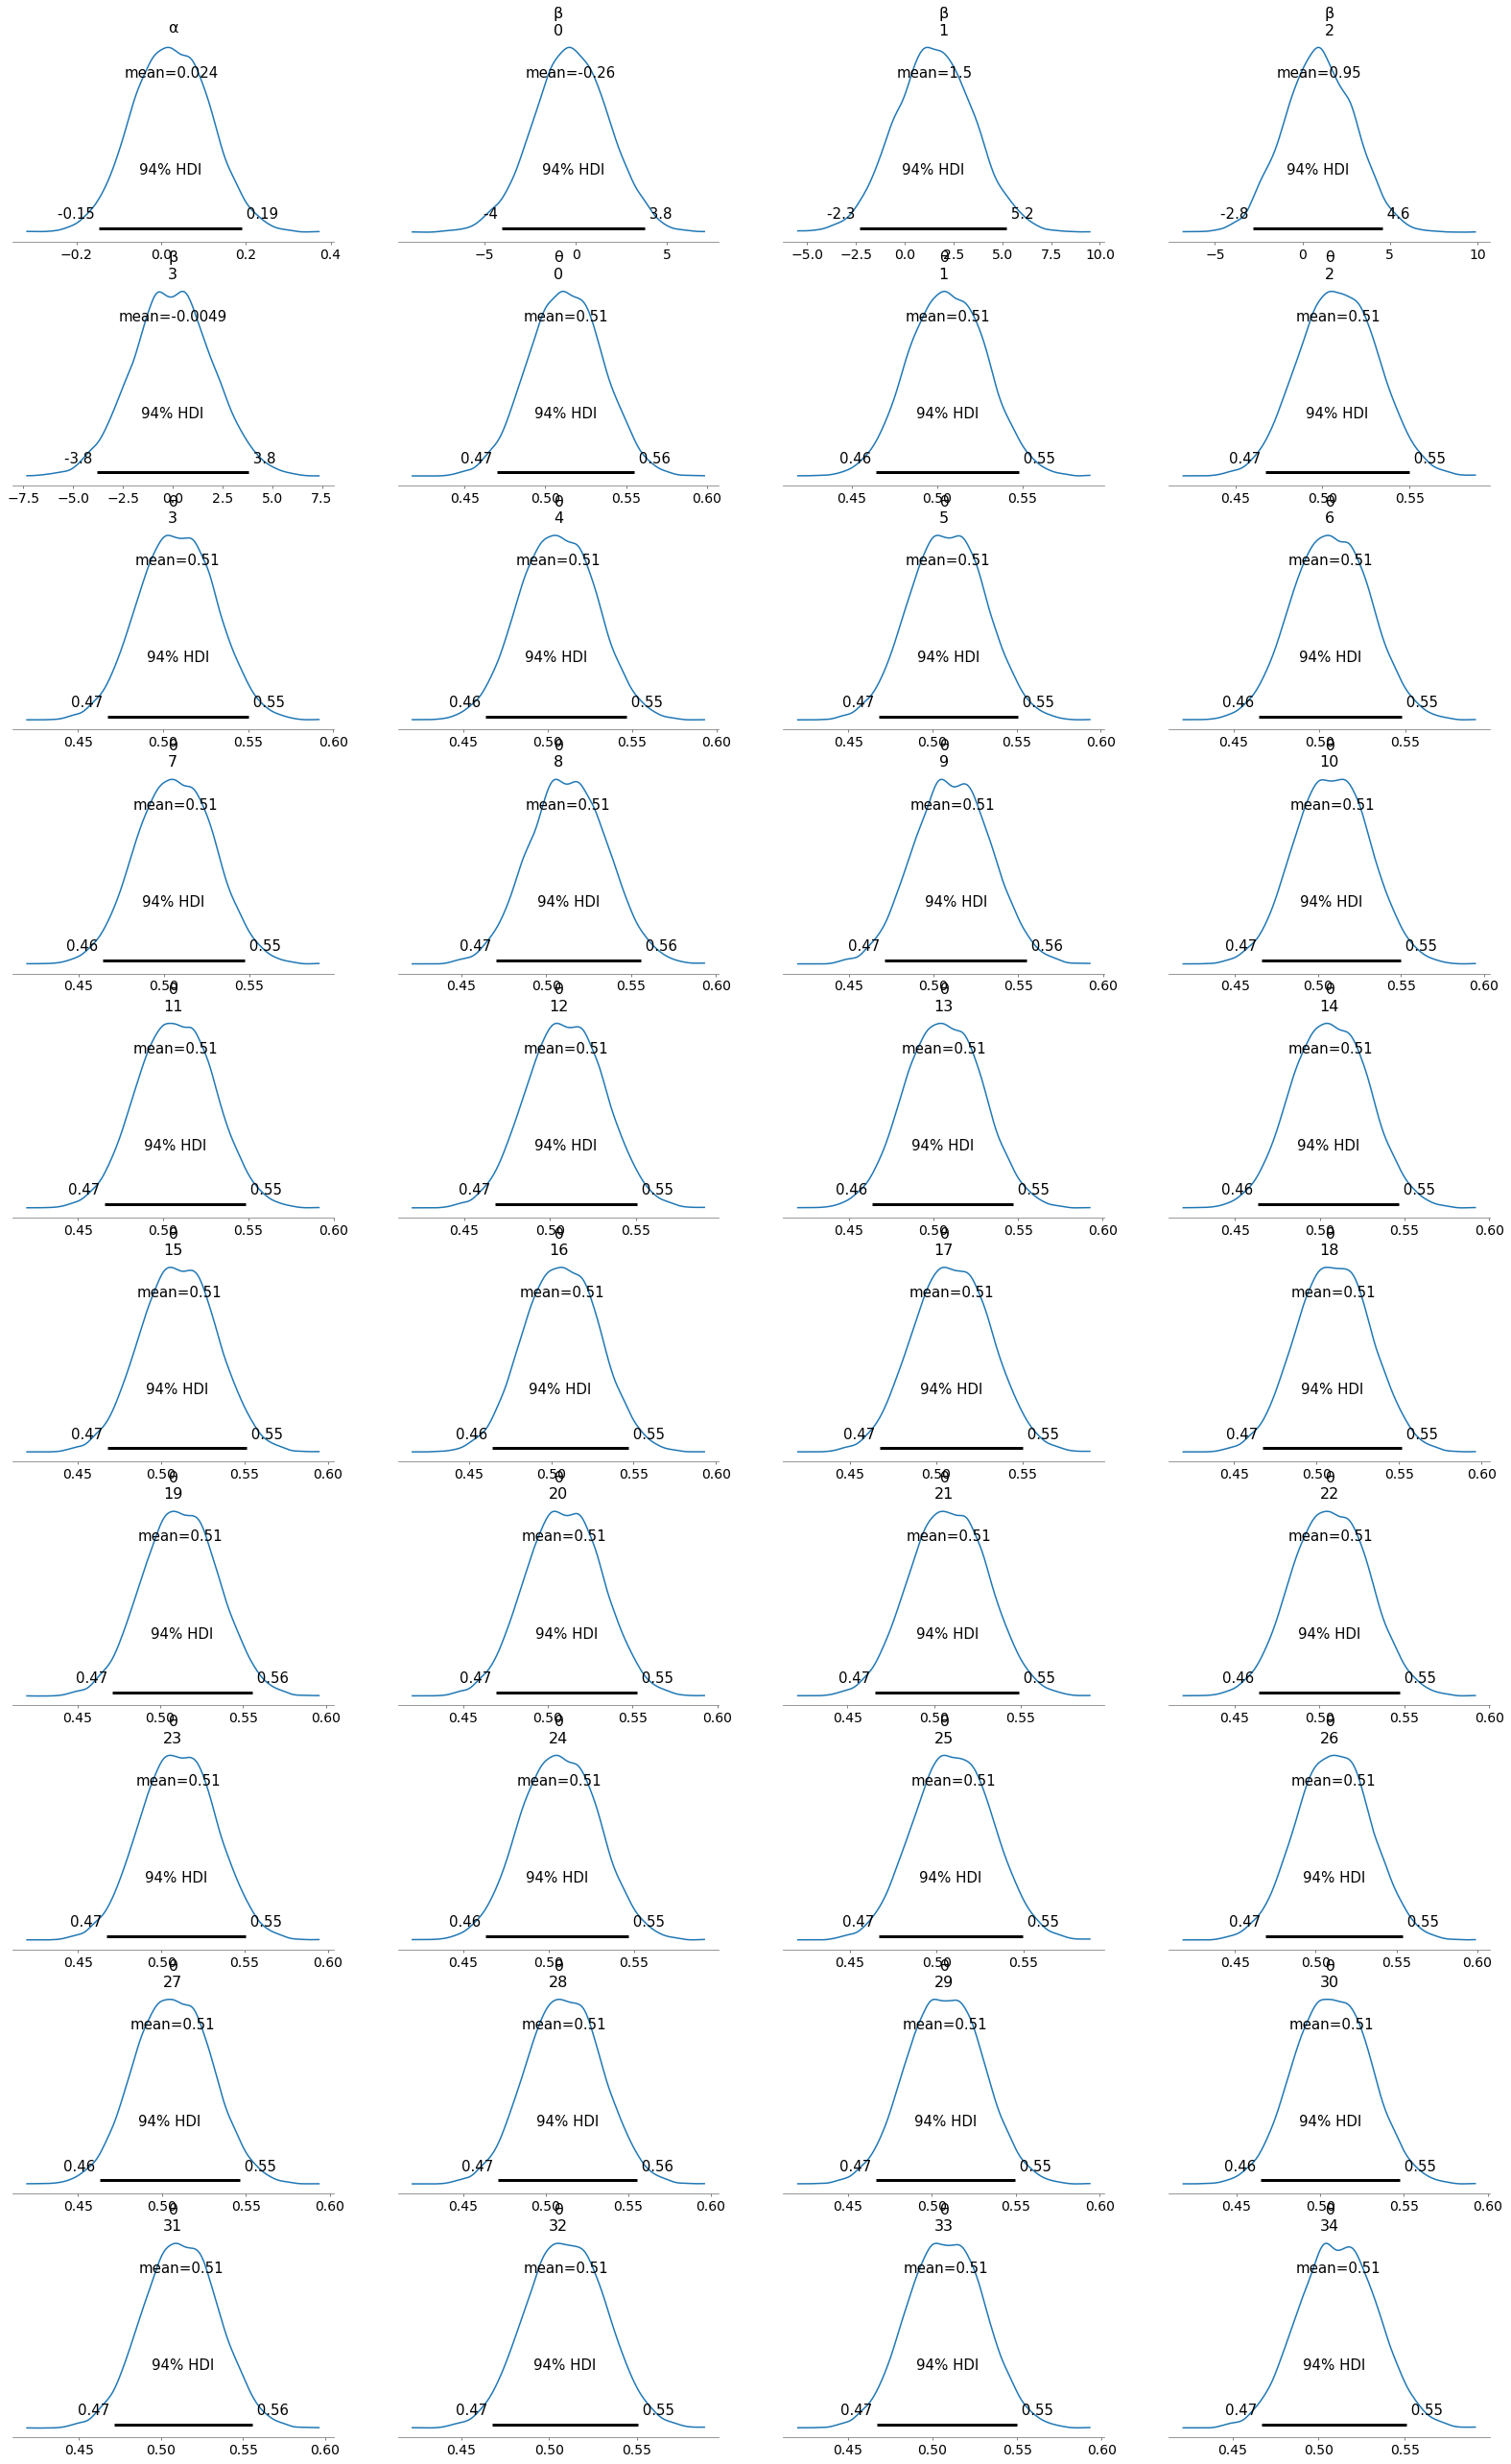

In [257]:
az.plot_posterior(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  This is separate from the ipykernel package so we can avoid doing imports until
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` withou

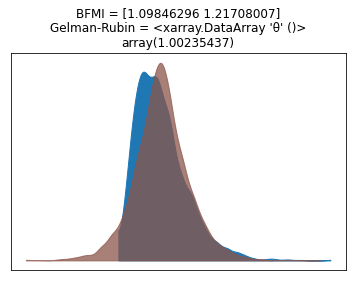

In [12]:
bfmi = pm.bfmi(trace_1)
max_gr = max(np.max(gr_stats) for gr_stats in az.rhat(trace_1).values())
(pm.energyplot(trace_1, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

Our model has converged well and the Gelman-Rubin statistic looks fine.

*   Now that we have computed the posterior, we are going to illustrate how to use the simulation results to derive predictions.
*   The following function will randomly draw 1000 samples of parameters from the trace. Then, for each sample, it will draw approx. 250 random numbers from a normal distribution specified by the values of μ and σ in that sample.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


[Text(0.5, 1.0, 'Posterior predictive of the mean'),
 Text(0.5, 0, 'mean(x)'),
 Text(0, 0.5, 'Frequency')]

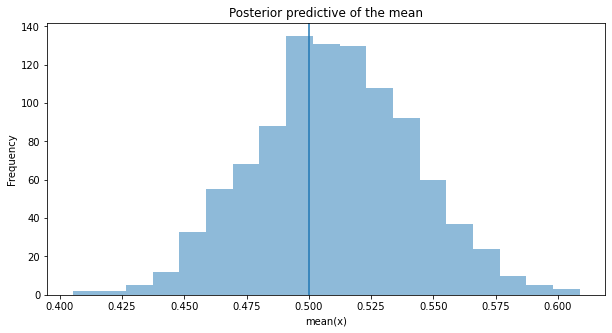

In [258]:
ppc = pm.sample_posterior_predictive(trace_1, samples=1000, model=model_1)
np.asarray(ppc['yl']).shape
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['yl']], bins=19, alpha=0.5)
ax.axvline(y.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')

As we can see that the mean of data pefectly matches to the mean of the **predicted** Posterior distribution. Although, the actual mean does not exactly seem to fit to the center but focusing on numerical values, the mean is the same within 1 decimal place precision.

In [259]:
with model_1:
    pm.set_data({'features': X_test})
    posterior = pm.sample_posterior_predictive(trace_1)

#### The above code cell is really important 
It is setting the x test data into the model so that the samples from the posterior distribution could be sampled given the test data instead of train data that was set while training in the same **features** key.

#### The below code cell is the main step for y prediction from MCMC and evaluation with y test
* As the 2000 samples generated above contains approx. 250 values in each sample, therefore we get 2000x250 matrix
* Each sample is a y_prediction sampled from the y posterior distribution above
* y_pred key contains the 2000x250 matrix values
* Then I have taken the mean column wise to take the average of each y prediction from 2000 samples generated.
* y_prediction variable will then contain an averaged 250 y predictions from the 2000 samples generated against each x test value.
* This y_prediction is the MCMC prediction/output of the model
* As this y predictions would be continous values between 0-1 and we need discrete class labels, i.e, 0 or 1 for classification. Therefore, I have thresholded each value with 0.5 to 0 or 1.
* The result is then evaluated with the respective y test values from the dataset using the same general classification score calculator that was also used to evaluate the ML classification models.

In [260]:
y_prediction = posterior['yl'].mean(axis=0)
y_prediction_thresholded = []
for y in y_prediction:
    if y < 0.5: y_prediction_thresholded.append(0)
    else: y_prediction_thresholded.append(1)
y_prediction_thresholded = np.array(y_prediction_thresholded)
calculate_classification_metrics(y_test, y_prediction_thresholded)

Confusion Matrix: [[ 9 79]
 [ 6 73]]
Precision: [0.6        0.48026316]
Recall: [0.10227273 0.92405063]
Accuracy: 0.49101796407185627
Loss: 17.57999498062511


#### MCMC Analysis:
As we can see that accuracy of classification is **49%** with least* precision and recall values.

### MCMC vs ML Analysis for Classification(II) & Conclusion:

* In this case, ML algorithms for classification has significantly performed better than MCMC for this dataset.
* With only 4 features selected, MCMC was able to provide approximately **49%** accuracy with very low precision and recall values
* After performing feature selection for ML, it performed quite poor while with all the feature it performed better but was not good. 
* RandomForest Classifier performed better out of 4 but all the other classifiers didn't perform really well.
* Feature selection isn't fruitful with the dataset that contains a lot of categorical column data as a high correlation occurs with the target variable but those columns cannot be considered as they don't map much information.
* In that case, features with numerical values are needed to be handpicked which isn't an ideal way to go.

## Final Thoughts

* MCMC performs better than ML algorithms or at least is neck to neck with ML algorithms for most datasets.
* The main thing which I observed for MCMC while doing this project, that it requires columns data to follow some kind of distribution. Therefore, if the column is Categorical with binary classes, so it would follow Bernoulli Distribution otherwise multi class label won't produce good results.
* On the other hand, if the column data is random numerical and it follows any distribution, MCMC would outperform. 
* If these distribution requirement is fulfilled in the dataset, then MCMC outperforms Machine Learning algos.
* As the dataset size increases, so does the convergence time for MCMC, which is again a trade off of MCMC in comparison to ML algorithms which take less time comparatively.
* On the classification dataset above, MCMC performed worse than ML as the columns that were most correlated were categorical and the numerical ones were very few and least correlated. Hence, the performance degraded.
* On the contrary, ML performed better in such cases, when all the columns were considered, in which case we could not consider all columns for MCMC.